# Практическое задание к уроку 5. Рекуррентные нейронные сети

1. Попробуйте обучить нейронную сеть LSTM на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). Опишите, какой результат вы получили? Что помогло вам улучшить ее точность?


2. *Попробуйте на numpy реализовать нейронную сеть архитектуры LSTM


3. *Предложите свои варианты решения проблемы исчезающего градиента в RNN

In [1]:
!pip install --upgrade pip

In [2]:
!pip install tensorflow -latest


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -l


In [3]:
!pip install --upgrade tensorflow

In [4]:
!pip install tensorflow_datasets

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# from google.colab import drive
# drive.mount('drive')

In [6]:
passengers_data = pd.read_csv("airline-passengers.csv")
passengers_data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


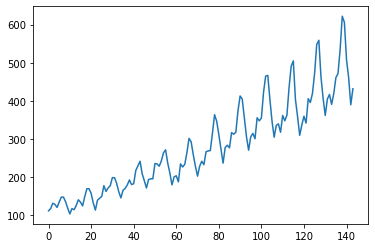

In [7]:
plt.plot(passengers_data['Passengers'])

In [8]:
dataset = passengers_data['Passengers']
dataset = np.array(dataset).reshape(-1,1)
dataset[:10]

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119]])

In [9]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset.min(),dataset.max()

(0.0, 1.0)

In [10]:
train_size = 100
test_size = 44
train = dataset[0:train_size, :]
train.shape

(100, 1)

In [11]:
test = dataset[train_size:144, :]
test.shape

(44, 1)

In [12]:
def get_data(dataset, look_back=10):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
X_train, y_train = get_data(test, look_back=10)
X_test, y_test = get_data(test, look_back=10)

In [14]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [15]:
X_train.shape

(33, 10, 1)

In [16]:
X_test.shape

(33, 10, 1)

In [17]:
look_back = 10
model = Sequential()

# model.add(LSTM(5, input_shape = ( 1, look_back)))
model.add(LSTM(128,return_sequences=False,input_shape=( look_back,1)))
# model.add(LSTM(128,return_sequences=False,input_shape=( 10,1)))

# model.add(LSTM(5, input_shape = ( )))

model.add(Dense(1))

model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
# model.compile(loss="mse", optimizer="adam", metrics=['mae'])

2022-01-26 15:01:36.081906: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, y_train, epochs=25, batch_size=1)
# model.fit(X_train, y_train,
#           batch_size=1,
#           epochs=25, # увеличьте при необходимости
#           validation_data=(X_test, y_test))

Epoch 1/25
33/33 [==============================] - 1s 3ms/step - loss: 0.0945 - accuracy: 0.0000e+00
Epoch 2/25
33/33 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.0303
Epoch 3/25
33/33 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.0303
Epoch 4/25
33/33 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.0303
Epoch 5/25
33/33 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.0303
Epoch 6/25
33/33 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.0303
Epoch 7/25
33/33 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.0303  
Epoch 8/25
33/33 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.0303
Epoch 9/25
33/33 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.0303
Epoch 10/25
33/33 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.0303
Epoch 11/25
3

In [20]:
y_pred = model.predict(X_test)

In [21]:
y_pred = scaler.inverse_transform(y_pred)
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

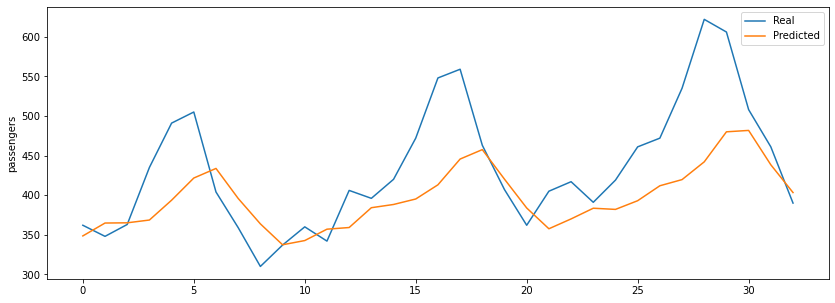

In [22]:
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real')
plt.plot(y_pred, label = 'Predicted')
plt.ylabel('passengers')
plt.legend()
plt.show()

**Вывод:**
Судя по сдвигу на графике, предсказания запаздывают. Увеличение количества эпох и сокращение количества слоев до 2 способствовало улучшению результата.